In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet
from statsmodels.tools.eval_measures import rmse

df = pd.read_csv('/Users/alanchan/Documents/UCL/Year 4/ELEC0088/SNS assignment 22-23/London Property Price/ukhpi-property-type-london-from-1977-06-01-to-2018-06-01.csv')
print(df.info())
df.dropna(subset = 'Average price All property types',inplace= True)
df.reset_index(drop=True, inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 27 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Name                                               493 non-null    object 
 1   URI                                                493 non-null    object 
 2   Region GSS code                                    493 non-null    object 
 3   Period                                             493 non-null    object 
 4   Sales volume                                       282 non-null    float64
 5   Reporting period                                   493 non-null    object 
 6   House price index All property types               493 non-null    float64
 7   Average price All property types                   493 non-null    int64  
 8   Percentage change (monthly) All property types     492 non-null    float64
 9   Percentage

In [2]:
# print(df.tail())
df=df[["Period","Average price All property types"]]
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'], format = '%Y-%m')
print(df.tail())

            ds       y
488 2018-02-01  477860
489 2018-03-01  472357
490 2018-04-01  477253
491 2018-05-01  478485
492 2018-06-01  479931


In [3]:
df.sort_values(by='ds', inplace = True)
df.reset_index(drop=True, inplace=True)
# print(df.head())
print(df.tail())

            ds       y
488 2018-02-01  477860
489 2018-03-01  472357
490 2018-04-01  477253
491 2018-05-01  478485
492 2018-06-01  479931


493


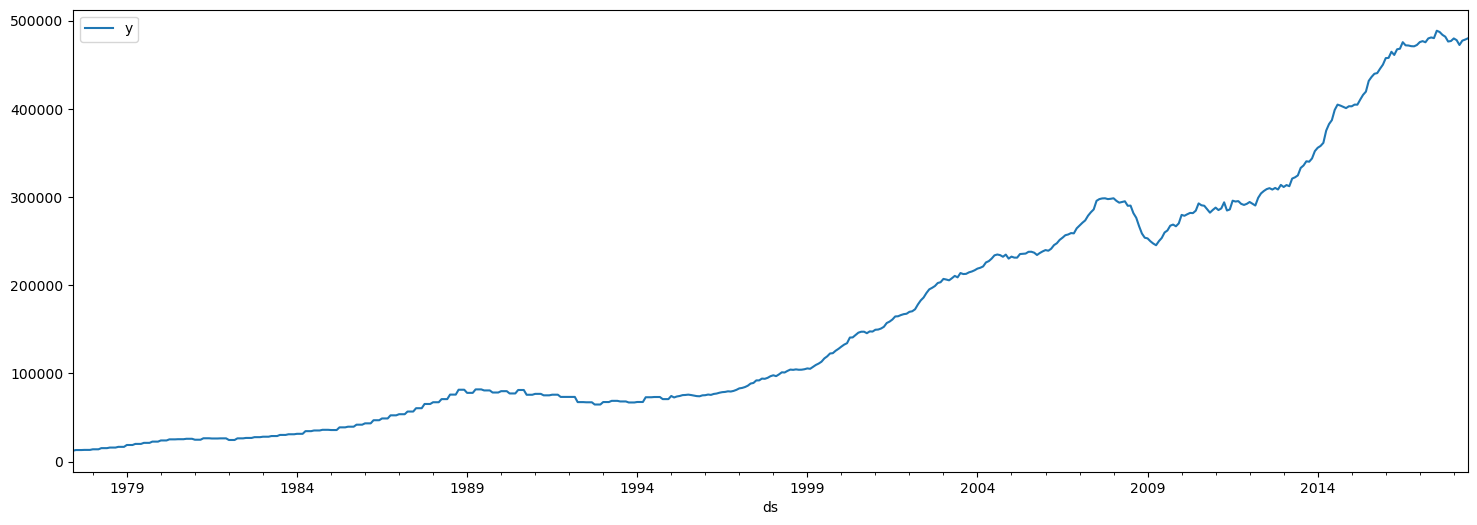

In [4]:
df.plot(x='ds',y='y',figsize=(18,6))
print(len(df))

In [25]:
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

print(len(train))
print(len(test))

print(df.tail())

481
12
            ds       y
488 2018-02-01  477860
489 2018-03-01  472357
490 2018-04-01  477253
491 2018-05-01  478485
492 2018-06-01  479931


In [26]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=12, freq = 'MS') #MS for monthly, H for hourly
forecast = m.predict(future)
print(df.tail())
print(future.tail())

# forecast.tail()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
# future.tail()

11:59:50 - cmdstanpy - INFO - Chain [1] start processing
11:59:50 - cmdstanpy - INFO - Chain [1] done processing


            ds       y
488 2018-02-01  477860
489 2018-03-01  472357
490 2018-04-01  477253
491 2018-05-01  478485
492 2018-06-01  479931
            ds
488 2018-02-01
489 2018-03-01
490 2018-04-01
491 2018-05-01
492 2018-06-01


,ds,yhat,yhat_lower,yhat_upper
488,2018-02-01,482351.868599,467352.644716,499335.421272
489,2018-03-01,483991.759802,467253.282734,501723.280799
490,2018-04-01,488585.487380,472908.205847,503916.075818
491,2018-05-01,491050.430429,474699.565958,506980.486940
492,2018-06-01,493268.431509,477804.796807,507682.810150


In [28]:
plot_plotly(m ,forecast)

In [29]:
plot_components_plotly(m, forecast)

In [31]:
predictions = forecast.iloc[-12:]['yhat']
print("Root Mean Squared Error between actual and  predicted values: ",rmse(predictions,test['y']))
print("Mean Value of Test Dataset:", test['y'].mean())

Root Mean Squared Error between actual and  predicted values:  10322.597414779848
Mean Value of Test Dataset: 480000.25


In [32]:
training = forecast.iloc[:len(forecast)-12]['yhat']
print("Root Mean Squared Error between actual and  predicted values: ",rmse(training,train['y']))

Root Mean Squared Error between actual and  predicted values:  12492.560517556529
